In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# warning 안뜨게하기

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# 한글 encoding

# utf-8
# euckr
# cp949 == ansi

# matplotlib 한글 깨짐 방지
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [57]:
df = pd.read_csv('./datafiles/subwaytime.csv', encoding = 'cp949')

In [58]:
df.head()
# 출근시간에 승차, 하차 인원이 가장 많은 역은?? (07~09시)

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,2019-01,1호선,150.0,서울역,927,22,10682,8774,13504,45545,...,33149,19442,3612,7167,0,410,0,0,0,0
2,2019-01,1호선,151.0,시청,74,0,2409,4049,3532,19241,...,14478,4079,981,1256,3,29,0,0,0,0
3,2019-01,1호선,152.0,종각,100,8,4409,5105,4593,26969,...,54264,5560,4886,1722,0,0,0,0,0,0
4,2019-01,1호선,153.0,종로3가,122,4,5061,2520,3876,12832,...,25970,5503,3214,2471,0,52,0,0,0,0


In [64]:
# 전처리
li = []
for i in df.columns:
    if '~' in i:
        li.append(i[:2]+'승차')
    elif 'Un' in i:
        li.append('0' + str(int(i[-1])-1)+'하차')
    else:
        li.append(i)
        
df.columns = li

In [65]:
df.head()

,사용월,호선명,역ID,지하철역,04승차,04하차,05승차,06하차,06승차,08하차,...,23승차,02하차,00승차,04하차,01승차,06하차,02승차,08하차,03승차,00하차
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,2019-01,1호선,150.0,서울역,927,22,10682,8774,13504,45545,...,33149,19442,3612,7167,0,410,0,0,0,0
2,2019-01,1호선,151.0,시청,74,0,2409,4049,3532,19241,...,14478,4079,981,1256,3,29,0,0,0,0
3,2019-01,1호선,152.0,종각,100,8,4409,5105,4593,26969,...,54264,5560,4886,1722,0,0,0,0,0,0
4,2019-01,1호선,153.0,종로3가,122,4,5061,2520,3876,12832,...,25970,5503,3214,2471,0,52,0,0,0,0


In [86]:
# 강사님
# 출근시간에 승차, 하차 인원이 가장 많은 역은?? (07~09시)
df = pd.read_csv('./datafiles/subwaytime.csv', encoding = 'cp949')

In [87]:
# 전처리
df.drop(0, inplace = True)

In [88]:
df = df.set_index('지하철역')

In [91]:
df.drop(['사용월','역ID'],axis = 1, inplace = True)

In [93]:
df.head()

,호선명,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,...,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
지하철역,,,,,,,,,,,,,,,,,,,,,
서울역,1호선,927,22,10682,8774,13504,45545,39110,103863,80492,...,33149,19442,3612,7167,0,410,0,0,0,0
시청,1호선,74,0,2409,4049,3532,19241,7703,66876,9978,...,14478,4079,981,1256,3,29,0,0,0,0
종각,1호선,100,8,4409,5105,4593,26969,6733,104259,11028,...,54264,5560,4886,1722,0,0,0,0,0,0
종로3가,1호선,122,4,5061,2520,3876,12832,6066,29381,9735,...,25970,5503,3214,2471,0,52,0,0,0,0
종로5가,1호선,43,2,1934,3590,2935,14991,5143,40376,8509,...,12013,3450,785,980,1,3,0,0,0,0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598 entries, 서울역 to 신설동
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   호선명                598 non-null    object
 1   04:00:00~04:59:59  598 non-null    object
 2   Unnamed: 5         598 non-null    object
 3   05:00:00~05:59:59  598 non-null    object
 4   Unnamed: 7         598 non-null    object
 5   06:00:00~06:59:59  598 non-null    object
 6   Unnamed: 9         598 non-null    object
 7   07:00:00~07:59:59  598 non-null    object
 8   Unnamed: 11        598 non-null    object
 9   08:00:00~08:59:59  598 non-null    object
 10  Unnamed: 13        598 non-null    object
 11  09:00:00~09:59:59  598 non-null    object
 12  Unnamed: 15        598 non-null    object
 13  10:00:00~10:59:59  598 non-null    object
 14  Unnamed: 17        598 non-null    object
 15  11:00:00~11:59:59  598 non-null    object
 16  Unnamed: 19        598 non-null    object
 17  

In [96]:
for c in df.columns[1:]:
    df[c] = df[c].astype('float')

In [98]:
df.head()

,호선명,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,...,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
지하철역,,,,,,,,,,,,,,,,,,,,,
서울역,1호선,927.0,22.0,10682.0,8774.0,13504.0,45545.0,39110.0,103863.0,80492.0,...,33149.0,19442.0,3612.0,7167.0,0.0,410.0,0.0,0.0,0.0,0.0
시청,1호선,74.0,0.0,2409.0,4049.0,3532.0,19241.0,7703.0,66876.0,9978.0,...,14478.0,4079.0,981.0,1256.0,3.0,29.0,0.0,0.0,0.0,0.0
종각,1호선,100.0,8.0,4409.0,5105.0,4593.0,26969.0,6733.0,104259.0,11028.0,...,54264.0,5560.0,4886.0,1722.0,0.0,0.0,0.0,0.0,0.0,0.0
종로3가,1호선,122.0,4.0,5061.0,2520.0,3876.0,12832.0,6066.0,29381.0,9735.0,...,25970.0,5503.0,3214.0,2471.0,0.0,52.0,0.0,0.0,0.0,0.0
종로5가,1호선,43.0,2.0,1934.0,3590.0,2935.0,14991.0,5143.0,40376.0,8509.0,...,12013.0,3450.0,785.0,980.0,1.0,3.0,0.0,0.0,0.0,0.0


In [99]:
# tolist() : 리스트로 변환

st_index = df.columns.tolist().index('07:00:00~07:59:59')
ed_index = df.columns.tolist().index('08:00:00~08:59:59')
print(st_index,ed_index)

7 9


In [100]:
# 승차
col_idx = []
for i in range(st_index,ed_index+1,2):
    col_idx.append(i)
col_idx

[7, 9]

In [103]:
df.iloc[:,col_idx].sum(axis=1).sort_values(ascending=False).iloc[:1]

지하철역
신림    598255.0
dtype: float64

In [104]:
# 하차
col_idx = []
for i in range(st_index+1,ed_index+2,2):
    col_idx.append(i)
df.iloc[:,col_idx].sum(axis=1).sort_values(ascending=False).iloc[:1]

지하철역
강남    563549.0
dtype: float64

In [213]:
## 다른 방법
cols = []

for i in range(24):
    for j in ['승','하']:
        if i < 10:
            cols.append('0'+str(i)+j)
        else:
            cols.append(str(i)+j)
new_cols = ['호선명'] + cols[8:] + cols[:8]
df.columns = new_cols 

In [214]:
df.loc[:,['07승','08승']].sum(axis=1).sort_values(ascending=False)

지하철역
신림             598255.0
구로디지털단지        362651.0
서울대입구(관악구청)    355245.0
연신내            337596.0
잠실(송파구청)       325053.0
                 ...   
서울역                 0.0
지축                  0.0
김포공항                0.0
홍대입구                0.0
창동                  0.0
Length: 598, dtype: float64

In [215]:
# 전체 시간에서 승차 인원이 가장 많은 역?
df.iloc[:,1:].max(axis=1).sort_values(ascending=False)

지하철역
가산디지털단지     449728.0
강남          431115.0
역삼          397974.0
삼성(무역센터)    378832.0
을지로입구       370776.0
              ...   
창동               3.0
계양               3.0
서울역              2.0
홍대입구             1.0
지축               1.0
Length: 598, dtype: float64

In [216]:
# 퇴근 시간에 하차인원이 가장 많은 역 (pm 7 ~ 10)
df.filter(like='하').iloc[:,15:18].max(axis=1).sort_values(ascending=False)

지하철역
신림             288901.0
홍대입구           241174.0
강남             226472.0
잠실(송파구청)       194440.0
서울대입구(관악구청)    187144.0
                 ...   
서울역                 0.0
충무로                 0.0
복정                  0.0
지축                  0.0
검암                  0.0
Length: 598, dtype: float64

In [217]:
# 강사님
df.loc[:,'19승':'22하'].sum(axis=1).sort_values(ascending=False)

지하철역
강남          1598140.0
홍대입구        1408293.0
잠실(송파구청)    1194755.0
신림          1061084.0
구로디지털단지      872855.0
              ...    
김포공항              2.0
지축                1.0
홍대입구              1.0
계양                0.0
검암                0.0
Length: 598, dtype: float64

In [164]:
# 신림역의 퇴근시간 이용자 수
df.loc['신림'][31:39].sum()

1061084.0

In [218]:
# 강사님

df[df.index == '신림'].loc[:,'19승':'22하'].sum(axis = 1)

지하철역
신림    1061084.0
dtype: float64

In [219]:
df.filter(like='승').rename(columns = lambda x: x[:1]).sort_index()

,0,0,0,0,0,0,1,1,1,1,...,1,1,2,2,2,2,0,0,0,0
지하철역,,,,,,,,,,,,,,,,,,,,,
4.19민주묘지,22.0,1392.0,2915.0,7188.0,8516.0,5959.0,5213.0,4708.0,5114.0,5593.0,...,4076.0,2530.0,1898.0,1572.0,1132.0,559.0,120.0,0.0,0.0,0.0
가능,200.0,7875.0,12850.0,26295.0,24915.0,16151.0,13271.0,12426.0,12775.0,11555.0,...,10870.0,7080.0,4917.0,4544.0,3447.0,1857.0,124.0,0.0,0.0,0.0
가락시장,18.0,2557.0,7234.0,22032.0,28073.0,19425.0,16487.0,17198.0,17001.0,17446.0,...,34994.0,15768.0,12467.0,12469.0,9056.0,4018.0,507.0,2.0,0.0,0.0
가락시장,23.0,2653.0,4703.0,9910.0,14797.0,11377.0,10100.0,11804.0,12332.0,13367.0,...,31958.0,15592.0,12983.0,14846.0,11647.0,5589.0,1057.0,0.0,0.0,0.0
가산디지털단지,752.0,7907.0,9689.0,20278.0,24937.0,19864.0,19123.0,24200.0,30418.0,38504.0,...,365886.0,169162.0,91657.0,84558.0,43418.0,19524.0,2495.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
회룡,879.0,13639.0,26033.0,60318.0,48129.0,32677.0,27305.0,25871.0,25317.0,22869.0,...,14782.0,8676.0,6949.0,5734.0,4467.0,1926.0,209.0,0.0,0.0,0.0
회현(남대문시장),41.0,2536.0,4214.0,6458.0,10628.0,15189.0,21509.0,32986.0,45848.0,58089.0,...,139066.0,68455.0,66441.0,30248.0,18619.0,7970.0,1014.0,0.0,0.0,0.0
효창공원앞,1.0,622.0,1517.0,4437.0,5773.0,3989.0,2900.0,2949.0,3235.0,3564.0,...,12689.0,6844.0,3593.0,3113.0,2185.0,1011.0,98.0,0.0,0.0,0.0


<AxesSubplot:>

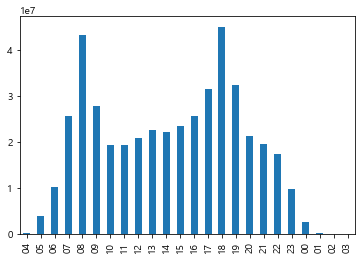

In [221]:
# 전체 역에서 시간대별 이용자 수를 bar chart
li1 = df.filter(like='승').rename(columns = lambda x: x[:2])
li2 = df.filter(like='하').rename(columns = lambda x: x[:2])
(li1 +li2).sum().plot(kind='bar')

In [224]:
# 강사님
cols = []

for i in range(24):
    for j in ['승','하']:
            cols.append(str(i)+j)
new_cols = ['호선명'] + cols[8:] + cols[:8]
df.columns = new_cols 

subway_pop = []
for i in range(0,24):
    subway_pop.append(df[['{}승'.format(i),'{}하'.format(i)]].sum(axis=1).sum())
    
subway_pop

[2493369.0,
 66908.0,
 43.0,
 1.0,
 106671.0,
 3774642.0,
 10173465.0,
 25512868.0,
 43153263.0,
 27710067.0,
 19311716.0,
 19284160.0,
 20792895.0,
 22434160.0,
 22086174.0,
 23442280.0,
 25664900.0,
 31518713.0,
 44971336.0,
 32241154.0,
 21286012.0,
 19514366.0,
 17398172.0,
 9809054.0]

<BarContainer object of 24 artists>

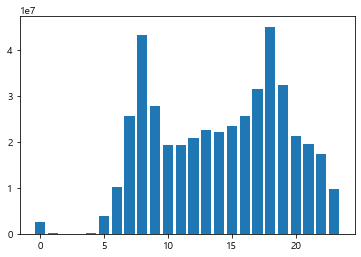

In [225]:
plt.bar(list(range(24)),subway_pop)

,호선명,4승,4하,5승,5하,6승,6하,7승,7하,8승,...,23승,23하,0승,0하,1승,1하,2승,2하,3승,3하
지하철역,,,,,,,,,,,,,,,,,,,,,
서울역,1호선,927.0,22.0,10682.0,8774.0,13504.0,45545.0,39110.0,103863.0,80492.0,...,33149.0,19442.0,3612.0,7167.0,0.0,410.0,0.0,0.0,0.0,0.0
시청,1호선,74.0,0.0,2409.0,4049.0,3532.0,19241.0,7703.0,66876.0,9978.0,...,14478.0,4079.0,981.0,1256.0,3.0,29.0,0.0,0.0,0.0,0.0
종각,1호선,100.0,8.0,4409.0,5105.0,4593.0,26969.0,6733.0,104259.0,11028.0,...,54264.0,5560.0,4886.0,1722.0,0.0,0.0,0.0,0.0,0.0,0.0
종로3가,1호선,122.0,4.0,5061.0,2520.0,3876.0,12832.0,6066.0,29381.0,9735.0,...,25970.0,5503.0,3214.0,2471.0,0.0,52.0,0.0,0.0,0.0,0.0
종로5가,1호선,43.0,2.0,1934.0,3590.0,2935.0,14991.0,5143.0,40376.0,8509.0,...,12013.0,3450.0,785.0,980.0,1.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
북한산보국문,우이신설선,5.0,3.0,1907.0,561.0,6026.0,2270.0,20034.0,3613.0,23966.0,...,1450.0,6536.0,450.0,1940.0,0.0,0.0,0.0,0.0,0.0,0.0
정릉,우이신설선,3.0,0.0,1508.0,625.0,4799.0,1809.0,12345.0,2999.0,14421.0,...,869.0,3595.0,287.0,1133.0,0.0,0.0,0.0,0.0,0.0,0.0
성신여대입구(돈암),우이신설선,2.0,0.0,769.0,281.0,1172.0,931.0,3373.0,3424.0,6730.0,...,3149.0,2152.0,648.0,662.0,0.0,0.0,0.0,0.0,0.0,0.0
